<a href="https://colab.research.google.com/github/gouveamoura/telecom_x/blob/main/TELECOM_X.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_json('/content/TelecomX_Data.json') #extraindo o arquivo json e fazendo a leitura inicial
df

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


In [3]:
df['customer']

,customer
0,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part..."
1,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne..."
2,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne..."
3,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne..."
4,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part..."
...,...
7262,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part..."
7263,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne..."
7264,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne..."
7265,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne..."


In [4]:
df_original = pd.read_json('/content/TelecomX_Data.json') #extraindo o arquivo json e fazendo a leitura inicial
df_id = df_original['customerID'] #coluna id não precisa de normalização
df_churn = df_original['Churn'] # coluna churn não precisa de normalização
df_customer = pd.json_normalize(df_original['customer']) #normalizando a coluna 'customer'
df_phone = pd.json_normalize(df_original['phone']) #normalizando a coluna 'phone'
df_internet = pd.json_normalize(df_original['internet']) #normalizando a coluna 'internet'
df_account = pd.json_normalize(df_original['account']) #normalizando a coluna 'account'
df = pd.concat([df_id, df_churn, df_customer, df_phone, df_internet, df_account], axis=1) #concatenando as colunas normalizadas
df

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


#Tratamento dos dados

In [5]:
# Lista das colunas com valores 'Yes'/'No'
colunas_y_n = [
    'Churn', 'Partner','Dependents', 'PhoneService', 'MultipleLines',
     'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport','StreamingTV','StreamingMovies', 'PaperlessBilling'
]

# Mapeamento final
mapeamento = {'Yes': True, 'No': False}

# Aplicação do tratamento e transformação
for coluna in colunas_y_n:
    # 1. Converter tudo para string, remover espaços e capitalizar
    df[coluna] = df[coluna].astype(str).str.strip().str.capitalize()


    # 3. Mapear para booleano
    df[coluna] = df[coluna].map(mapeamento)


    # 4. Transformar os dados em booleano
    df[coluna] = df[coluna].astype(bool)

In [6]:
df.head() # Analisando o resultado das transformações

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,False,Female,0,True,True,9,True,False,DSL,...,True,False,True,True,False,One year,True,Mailed check,65.6,593.3
1,0003-MKNFE,False,Male,0,False,False,9,True,True,DSL,...,False,False,False,False,True,Month-to-month,False,Mailed check,59.9,542.4
2,0004-TLHLJ,True,Male,0,False,False,4,True,False,Fiber optic,...,False,True,False,False,False,Month-to-month,True,Electronic check,73.9,280.85
3,0011-IGKFF,True,Male,1,True,False,13,True,False,Fiber optic,...,True,True,False,True,True,Month-to-month,True,Electronic check,98.0,1237.85
4,0013-EXCHZ,True,Female,1,True,False,3,True,False,Fiber optic,...,False,False,True,True,False,Month-to-month,True,Mailed check,83.9,267.4


In [7]:
df.info() #análise para transformação de dados.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   bool   
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   bool   
 5   Dependents        7267 non-null   bool   
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   bool   
 8   MultipleLines     7267 non-null   bool   
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   bool   
 11  OnlineBackup      7267 non-null   bool   
 12  DeviceProtection  7267 non-null   bool   
 13  TechSupport       7267 non-null   bool   
 14  StreamingTV       7267 non-null   bool   
 15  StreamingMovies   7267 non-null   bool   
 16  Contract          7267 non-null   object 


In [8]:
df.drop('customerID', axis = 1 , inplace = True) #removendo a coluna customerID

In [9]:
df['SeniorCitizen'] = df['SeniorCitizen'].astype(bool) #transformando a coluna SeniorCitizen em booleano (somente valores numéricos)

In [10]:
df['Charges.Total'] = pd.to_numeric(df['Charges.Total'], errors= 'coerce' ) #transformando a coluna Charges.Total em float


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7267 non-null   bool   
 1   gender            7267 non-null   object 
 2   SeniorCitizen     7267 non-null   bool   
 3   Partner           7267 non-null   bool   
 4   Dependents        7267 non-null   bool   
 5   tenure            7267 non-null   int64  
 6   PhoneService      7267 non-null   bool   
 7   MultipleLines     7267 non-null   bool   
 8   InternetService   7267 non-null   object 
 9   OnlineSecurity    7267 non-null   bool   
 10  OnlineBackup      7267 non-null   bool   
 11  DeviceProtection  7267 non-null   bool   
 12  TechSupport       7267 non-null   bool   
 13  StreamingTV       7267 non-null   bool   
 14  StreamingMovies   7267 non-null   bool   
 15  Contract          7267 non-null   object 
 16  PaperlessBilling  7267 non-null   bool   


In [12]:
df['gender'] = df['gender'].str.lower() #transformando a coluna gender em minusculo
df['gender'] = df['gender'].str.lower() #transformando a coluna gender em categoria
df['InternetService'] = df['InternetService'].str.lower() #transformando a coluna InternetService em categoria
df['PaymentMethod'] = df['PaymentMethod'].str.lower() #transformando a coluna PaymentMethod em categoria
df['Contract'] = df['Contract'].str.lower() #transformando a coluna Contract em categoria

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7267 non-null   bool   
 1   gender            7267 non-null   object 
 2   SeniorCitizen     7267 non-null   bool   
 3   Partner           7267 non-null   bool   
 4   Dependents        7267 non-null   bool   
 5   tenure            7267 non-null   int64  
 6   PhoneService      7267 non-null   bool   
 7   MultipleLines     7267 non-null   bool   
 8   InternetService   7267 non-null   object 
 9   OnlineSecurity    7267 non-null   bool   
 10  OnlineBackup      7267 non-null   bool   
 11  DeviceProtection  7267 non-null   bool   
 12  TechSupport       7267 non-null   bool   
 13  StreamingTV       7267 non-null   bool   
 14  StreamingMovies   7267 non-null   bool   
 15  Contract          7267 non-null   object 
 16  PaperlessBilling  7267 non-null   bool   


In [14]:
df.head()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,False,female,False,True,True,9,True,False,dsl,False,True,False,True,True,False,one year,True,mailed check,65.6,593.30
1,False,male,False,False,False,9,True,True,dsl,False,False,False,False,False,True,month-to-month,False,mailed check,59.9,542.40
2,True,male,False,False,False,4,True,False,fiber optic,False,False,True,False,False,False,month-to-month,True,electronic check,73.9,280.85
3,True,male,True,True,False,13,True,False,fiber optic,False,True,True,False,True,True,month-to-month,True,electronic check,98.0,1237.85
4,True,female,True,True,False,3,True,False,fiber optic,False,False,False,True,True,False,month-to-month,True,mailed check,83.9,267.40


In [15]:
df['Charges.Day'] = df['Charges.Monthly']/30 #criando a coluna de gastos diarios por cliente.

df['Charges.Day']

,Charges.Day
0,2.186667
1,1.996667
2,2.463333
3,3.266667
4,2.796667
...,...
7262,1.838333
7263,2.836667
7264,1.676667
7265,2.261667


In [16]:
df.head()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Charges.Day
0,False,female,False,True,True,9,True,False,dsl,False,...,False,True,True,False,one year,True,mailed check,65.6,593.30,2.186667
1,False,male,False,False,False,9,True,True,dsl,False,...,False,False,False,True,month-to-month,False,mailed check,59.9,542.40,1.996667
2,True,male,False,False,False,4,True,False,fiber optic,False,...,True,False,False,False,month-to-month,True,electronic check,73.9,280.85,2.463333
3,True,male,True,True,False,13,True,False,fiber optic,False,...,True,False,True,True,month-to-month,True,electronic check,98.0,1237.85,3.266667
4,True,female,True,True,False,3,True,False,fiber optic,False,...,False,True,True,False,month-to-month,True,mailed check,83.9,267.40,2.796667


In [17]:
df.describe() #descrição dos dados e análise inicial

,tenure,Charges.Monthly,Charges.Total,Charges.Day
count,7267.000000,7267.000000,7256.000000,7267.000000
mean,32.346498,64.720098,2280.634213,2.157337
std,24.571773,30.129572,2268.632997,1.004319
min,0.000000,18.250000,18.800000,0.608333
25%,9.000000,35.425000,400.225000,1.180833
50%,29.000000,70.300000,1391.000000,2.343333
75%,55.000000,89.875000,3785.300000,2.995833
max,72.000000,118.750000,8684.800000,3.958333


#Análises

#Gráfico de análise sobre quem saiu da empresa

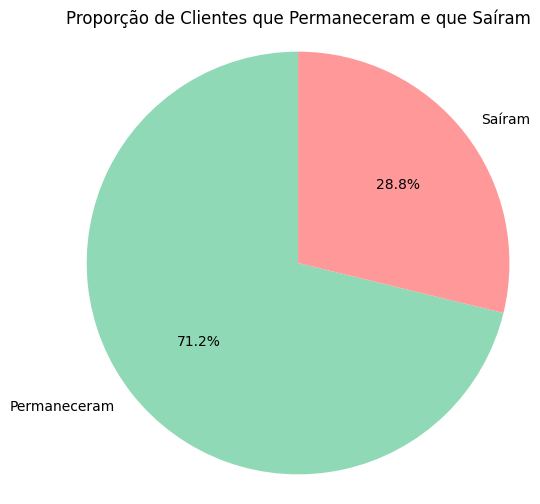

In [19]:
churn_counts = df['Churn'].value_counts()

# Mapeia os rótulos: False -> Permaneceram, True -> Saíram
labels = ['Permaneceram', 'Saíram']

# Gráfico de pizza
plt.figure(figsize=(6, 6))
plt.pie(churn_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#8fd9b6', '#ff9999'])
plt.title('Proporção de Clientes que Permaneceram e que Saíram')
plt.axis('equal')  # mantém o formato circular
plt.show()

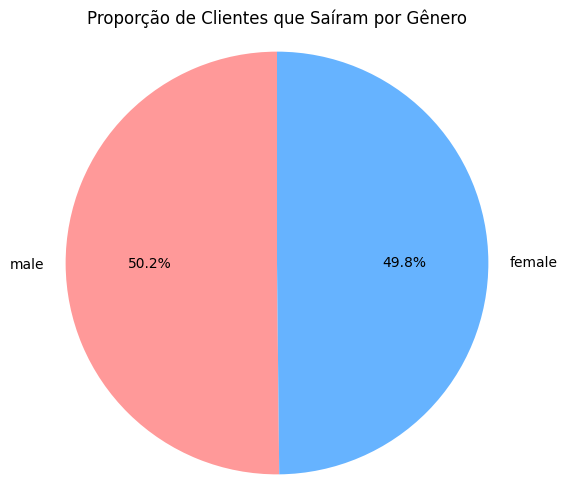

In [20]:

churn_true = df[df['Churn'] == True]

# Conta quantos homens e mulheres saíram
churn_by_gender = churn_true['gender'].value_counts()

# Gráfico de pizza
plt.figure(figsize=(6, 6))
plt.pie(churn_by_gender, labels=churn_by_gender.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999', '#66b3ff'])
plt.title('Proporção de Clientes que Saíram por Gênero')
plt.axis('equal')
plt.show()

/tmp/ipython-input-21-2878315325.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y='Charges.Monthly', palette='Set2')


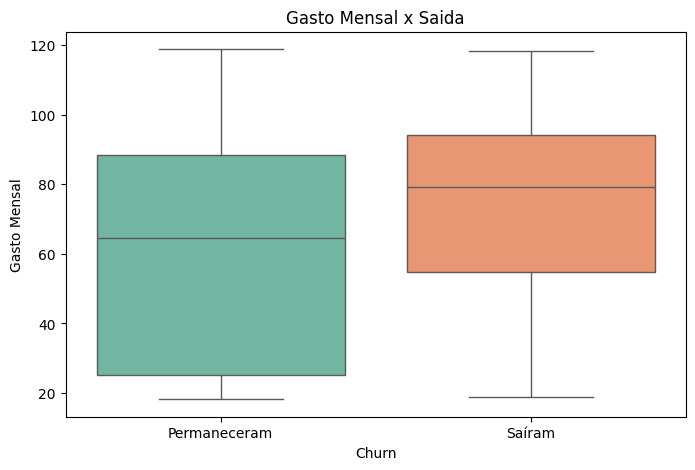

In [21]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Churn', y='Charges.Monthly', palette='Set2')
plt.xticks([0, 1], ['Permaneceram', 'Saíram'])
plt.title('Gasto Mensal x Saida')
plt.xlabel('Churn')
plt.ylabel('Gasto Mensal')
plt.show()

/tmp/ipython-input-22-1478560683.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Churn', y='Charges.Monthly', palette='pastel')


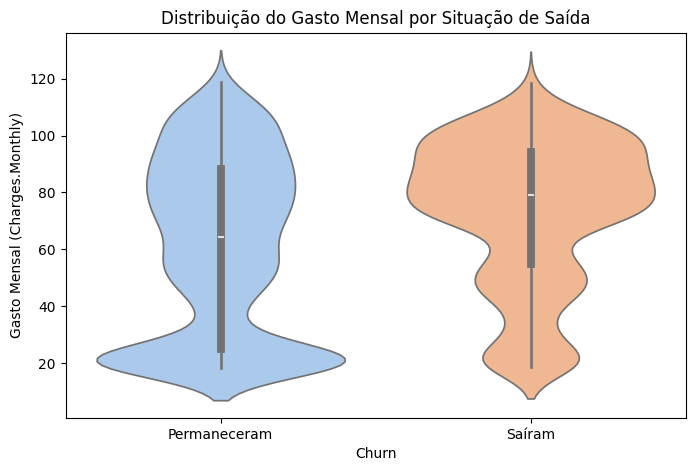

In [22]:
plt.figure(figsize=(8, 5))
sns.violinplot(data=df, x='Churn', y='Charges.Monthly', palette='pastel')
plt.xticks([0, 1], ['Permaneceram', 'Saíram'])
plt.title('Distribuição do Gasto Mensal por Situação de Saída')
plt.xlabel('Churn')
plt.ylabel('Gasto Mensal (Charges.Monthly)')
plt.show()

<Figure size 1000x600 with 0 Axes>

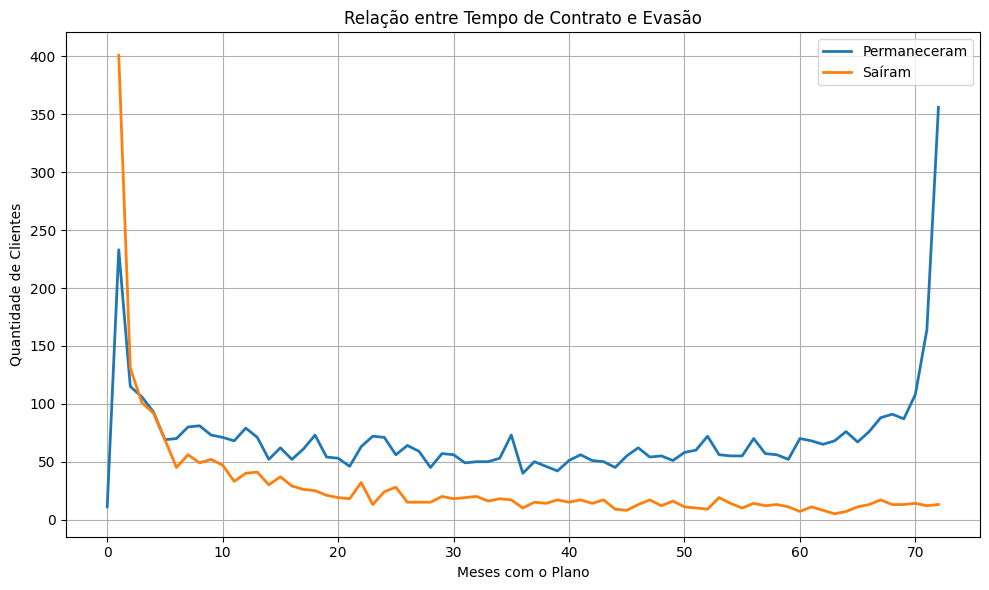

In [23]:
# Agrupa os dados por 'tenure' e 'Churn' e conta quantos clientes há em cada grupo
tenure_churn_counts = df.groupby(['tenure', 'Churn']).size().unstack()

# Plot do gráfico
plt.figure(figsize=(10, 6))
tenure_churn_counts.plot(kind='line', figsize=(10, 6), linewidth=2)

plt.title('Relação entre Tempo de Contrato e Evasão')
plt.xlabel('Meses com o Plano')
plt.ylabel('Quantidade de Clientes')
plt.legend(['Permaneceram', 'Saíram'])
plt.grid(True)
plt.tight_layout()
plt.show()

In [24]:
df['PaymentMethod']

,PaymentMethod
0,mailed check
1,mailed check
2,electronic check
3,electronic check
4,mailed check
...,...
7262,mailed check
7263,electronic check
7264,mailed check
7265,mailed check


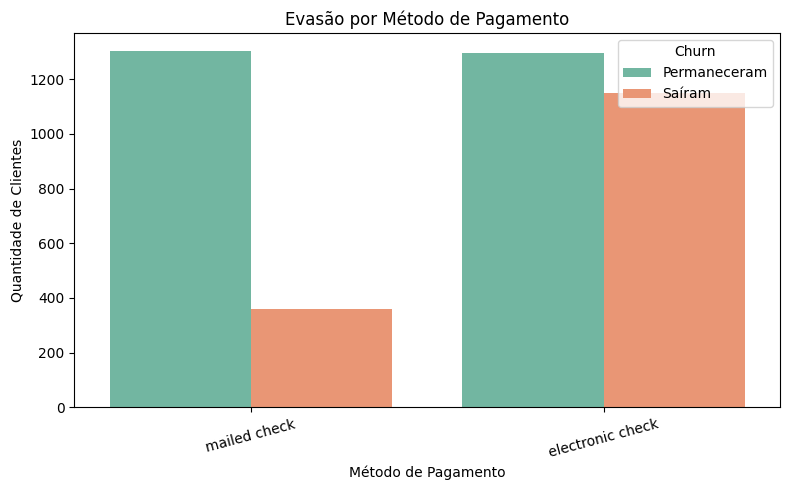

In [25]:
df_filtered = df[df['PaymentMethod'].isin(['mailed check', 'electronic check'])]

# Gráfico de barras agrupadas
plt.figure(figsize=(8, 5))
sns.countplot(data=df_filtered, x='PaymentMethod', hue='Churn', palette='Set2')

plt.title('Evasão por Método de Pagamento')
plt.xlabel('Método de Pagamento')
plt.ylabel('Quantidade de Clientes')
plt.legend(title='Churn', labels=['Permaneceram', 'Saíram'])
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

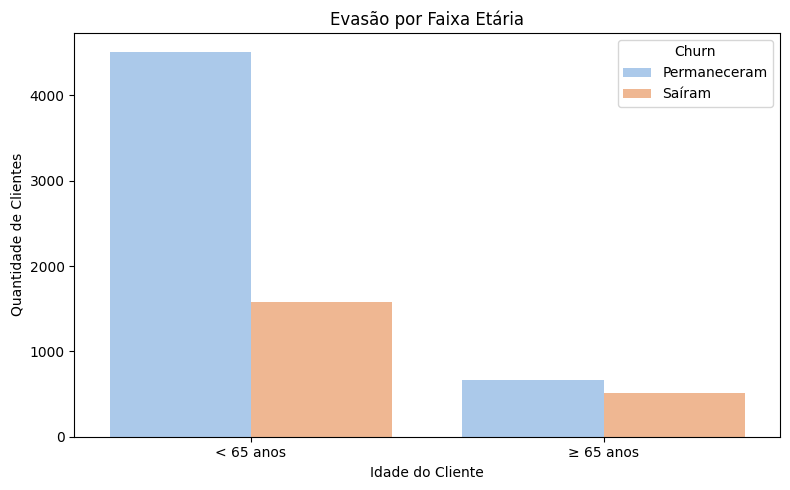

In [26]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='SeniorCitizen', hue='Churn', palette='pastel')

plt.title('Evasão por Faixa Etária')
plt.xlabel('Idade do Cliente')
plt.ylabel('Quantidade de Clientes')
plt.xticks([0, 1], ['< 65 anos', '≥ 65 anos'])  # legenda mais amigável
plt.legend(title='Churn', labels=['Permaneceram', 'Saíram'])
plt.tight_layout()
plt.show()

In [27]:
print(df['Contract'].unique())

['one year' 'month-to-month' 'two year']


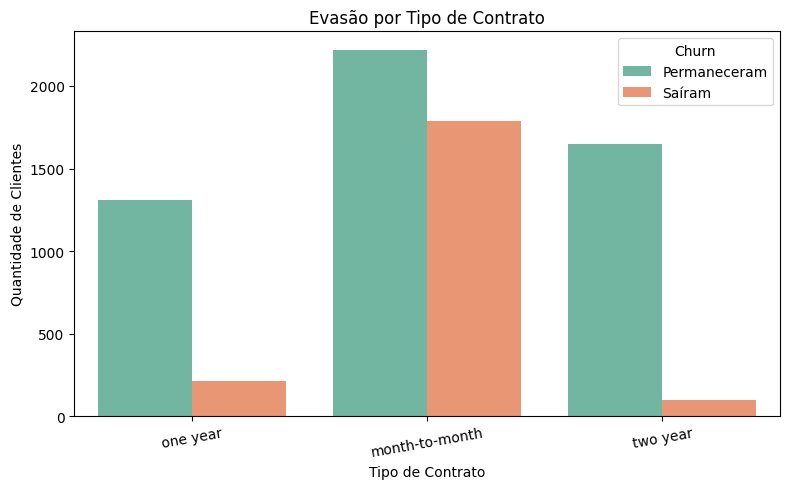

In [28]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Contract', hue='Churn', palette='Set2')

plt.title('Evasão por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Quantidade de Clientes')
plt.legend(title='Churn', labels=['Permaneceram', 'Saíram'])
plt.xticks(rotation=10)
plt.tight_layout()
plt.show()

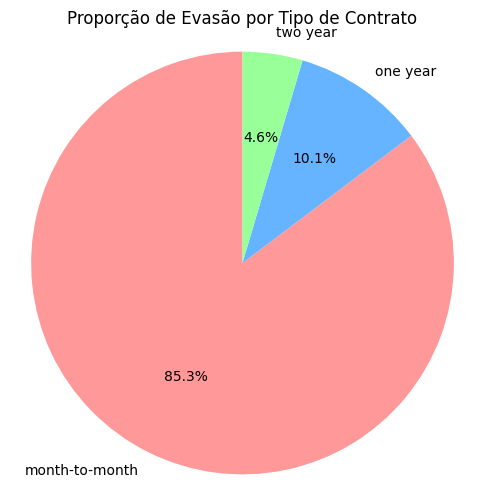

In [29]:
# Filtra apenas os clientes que saíram
churn_contract = df[df['Churn'] == True]['Contract'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(churn_contract, labels=churn_contract.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999', '#66b3ff', '#99ff99'])
plt.title('Proporção de Evasão por Tipo de Contrato')
plt.axis('equal')
plt.show()

/tmp/ipython-input-32-2208942643.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y='Charges.Monthly', ax=axes[0], palette='Set2')
/tmp/ipython-input-32-2208942643.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(['Permaneceram', 'Saíram'])
/tmp/ipython-input-32-2208942643.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y='Charges.Total', ax=axes[1], palette='Set3')
/tmp/ipython-input-32-2208942643.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
 

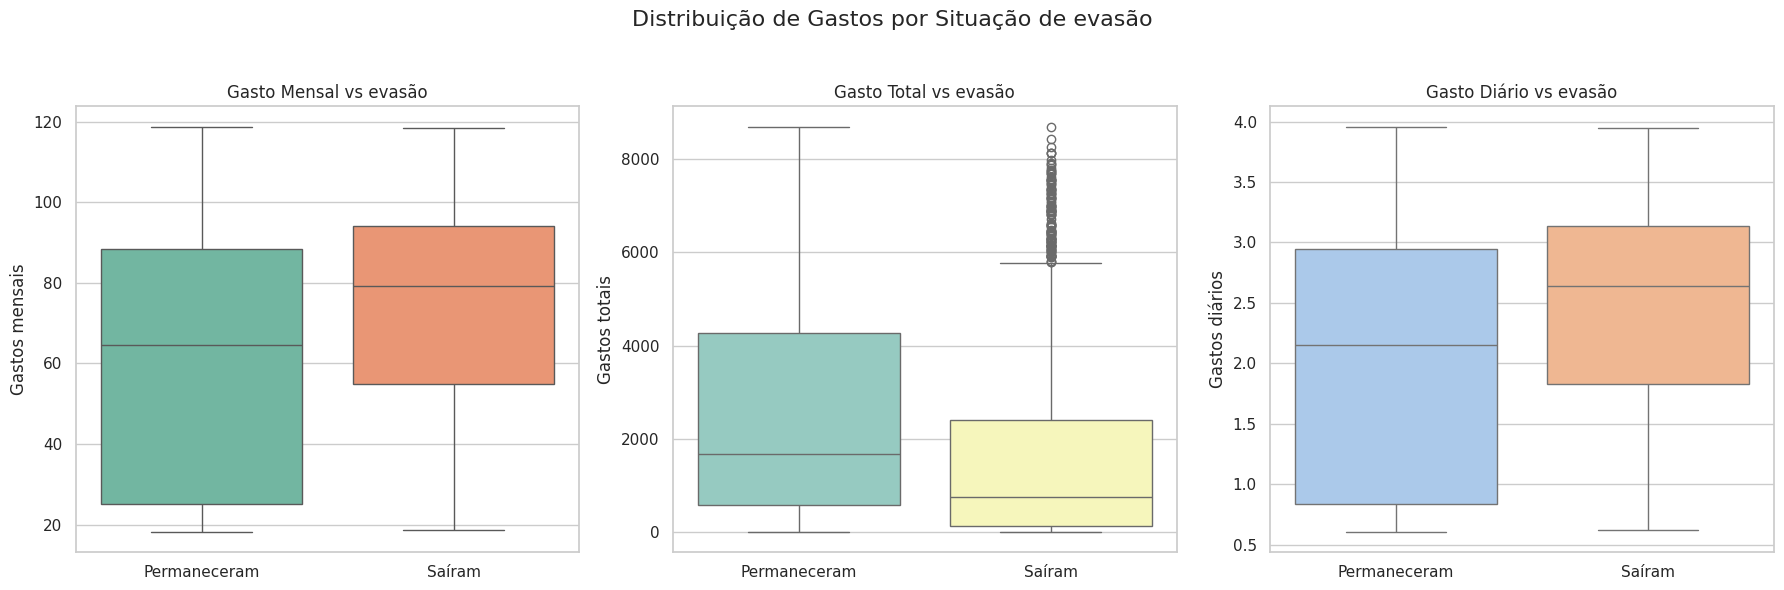

In [32]:
# Define o estilo dos gráficos
sns.set(style="whitegrid")

# Cria a figura com 3 subplots lado a lado
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Gasto Mensal
sns.boxplot(data=df, x='Churn', y='Charges.Monthly', ax=axes[0], palette='Set2')
axes[0].set_title('Gasto Mensal vs evasão')
axes[0].set_xlabel('')
axes[0].set_ylabel('Gastos mensais')
axes[0].set_xticklabels(['Permaneceram', 'Saíram'])

# Gasto Total
sns.boxplot(data=df, x='Churn', y='Charges.Total', ax=axes[1], palette='Set3')
axes[1].set_title('Gasto Total vs evasão')
axes[1].set_xlabel('')
axes[1].set_ylabel('Gastos totais')
axes[1].set_xticklabels(['Permaneceram', 'Saíram'])

# Gasto Diário
sns.boxplot(data=df, x='Churn', y='Charges.Day', ax=axes[2], palette='pastel')
axes[2].set_title('Gasto Diário vs evasão')
axes[2].set_xlabel('')
axes[2].set_ylabel('Gastos diários')
axes[2].set_xticklabels(['Permaneceram', 'Saíram'])

# Ajusta o layout
plt.suptitle('Distribuição de Gastos por Situação de evasão', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

***#RELATÓRIO FINAL***

#Introdução
Este trabalho teve como foco a análise da evasão de clientes (churn), com o objetivo de identificar padrões e comportamentos que possam estar associados à saída de usuários de uma empresa de serviços. A partir dessa análise, buscou-se levantar informações que ajudem a compreender as causas da evasão e, consequentemente, propor estratégias para reduzi-la e aumentar a retenção de clientes.

#Tratamento de Dados
A extração, limpeza e preparação dos dados foram feitas com o uso da biblioteca Pandas. As variáveis numéricas foram tratadas de forma simples, com conversões para float onde necessário. O maior desafio encontrado esteve nas colunas do tipo object, especialmente aquelas que continham respostas como "Yes" e "No". Essas colunas precisaram de um tratamento mais cuidadoso para serem convertidas corretamente em valores booleanos, garantindo a integridade e a consistência dos dados utilizados nas análises.

#Análises
Ao longo da análise exploratória, observou-se que o gênero não teve influência significativa sobre a evasão, já que a proporção de saída entre homens e mulheres foi praticamente a mesma. Em contrapartida, a idade se mostrou um fator relevante: a maior parte dos clientes que saíram tinham menos de 65 anos. O método de pagamento também teve peso considerável, sendo que clientes que utilizam pagamento eletrônico (electronic check) apresentaram maior tendência à evasão do que os que optam pelo boleto (mailed check).

O tipo de contrato foi um dos fatores mais impactantes. Clientes com contratos mensais (month-to-month) representaram a maioria das evasões, enquanto contratos de um ou dois anos demonstraram uma taxa de retenção significativamente maior. Além disso, clientes com gastos mensais, totais e diários acima da média estiveram mais propensos a cancelar o serviço. Outro padrão identificado foi o tempo de permanência: clientes mais novos, com poucos meses de contrato, apresentaram alta taxa de churn. Já os clientes com maior tempo de casa demonstraram comportamento mais estável e baixa evasão.

#Conclusão
A análise permitiu identificar um perfil de cliente mais propenso à evasão: pessoas com menos de 65 anos, que utilizam contrato mensal, optam pelo pagamento eletrônico, têm gastos acima da média e estão há pouco tempo na empresa. Já os clientes mais antigos, com contratos longos e menor gasto, demonstraram maior fidelidade. A taxa de evasão observada no período foi de aproximadamente 30%, concentrando-se nos perfis citados.

#Recomendações
Diante dos resultados, algumas estratégias são sugeridas para reduzir a evasão. É recomendável investir em programas de fidelidade com planos acessíveis e benefícios progressivos, principalmente voltados aos clientes nos primeiros meses de contrato. Oferecer descontos ou vantagens para quem migra para contratos mais longos também pode ajudar. Além disso, repensar a estrutura dos planos com altos custos e oferecer opções mais equilibradas pode contribuir para reter clientes com gastos acima da média. Por fim, ações de acolhimento, engajamento e suporte personalizado aos novos clientes podem fazer diferença nos primeiros meses, aumentando a chance de permanência e reduzindo o churn.